# Beautiful Soup (BS4) Tutorial

An introduction to the Beautiful Soup Python library.

## Intro to Beautiful Soup (BS4)

> **Note**
>
> Before you start using a new library, I always recommend taking a look at the documentation: https://beautiful-soup-4.readthedocs.io/en/latest/
>

There are plenty of guides on the internet giving you a quick introduction on how to use the BS4 library:

 - https://realpython.com/beautiful-soup-web-scraper-python/
 - https://www.geeksforgeeks.org/implementing-web-scraping-python-beautiful-soup/
 - https://www.digitalocean.com/community/tutorials/how-to-scrape-web-pages-with-beautiful-soup-and-python-3

> **Note**
>
> The older version of Beautiful Soup 3 is no longer being developed and  support for it was dropped in 2020. When looking at resources, make sure they are using the new BS4 library.
>

Before we can begin webscraping, we must first find a webpage to scrape!

Let's start by importing the requried libraries into our code.

> **Note**
> 
> Make sure you have installed both of these libraries in your local Python enviornment first:
>
> `pip install requests bs4`
>

In [81]:
import requests # This is used to request the websites content
from bs4 import BeautifulSoup # We only need the BeatifulSoup class from the bs4 library

Now let's request a website that we want to scrape, and turn it into a soup!

In [82]:
# Collect and parse first page
url_of_website = 'https://interstellar-war.com/killboard' # This is just an example page. In this case, it is a space fleet browser game.
page = requests.get(url_of_website) # We use the get function to grab the webpage
soup = BeautifulSoup(page.text, 'html.parser') # This is where the magic happens
print(type(soup))

<class 'bs4.BeautifulSoup'>


Now that we have soupified our webpage, we can use the BS4 library to quickly and precsisely find and extract specific elements.

In [83]:
all_h2_headers = soup.find_all('h2') # This will return a list of all h2 elements on the webpage.
for element in all_h2_headers:
    print(element)

<h2>Most valuable kills - past month</h2>
<h2>Most recent kills</h2>


In [84]:
all_table_rows = soup.find_all('tr') # This will return a list of all Table Row (tr) elements on the webpage
first_row = all_table_rows[0] # It looks like row 0 contains the table's headers
print(first_row.prettify()) # We can make our elements look pretty when we print them

<tr>
 <th>
  Time
 </th>
 <th style="width: 50px; text-align: center;">
  Ship
 </th>
 <th style="width:115px;">
  Place
 </th>
 <th style="width: 64px;">
 </th>
 <th>
  Victim
 </th>
 <th style="width: 64px;">
 </th>
 <th>
  Final Blow
 </th>
</tr>



Let's try to grab just the column headers from the table's first row.

> **Note**
> 
> Notice how we can use the find function on the elements that we got returned from our first find function? Since HTML is a layered language with elements inside of elements, we can keep using finds to narrow down what we are getting returned.
>

In [85]:
table_headers = first_row.find_all('th') # This will return a list of all Table Header (th) elements
for header in table_headers:
    print(header.get_text()) # Since we don't want all that funky html, let's just get the text

Time
Ship
Place
 
Victim
 
Final Blow


## Advanced Scraping

Now that we have some of the basics down, let's try to do something a bit more useful. Let's try to visualize the ammount of players that died at each of the different locations in the game. In order to do a complex task such as this, let's try to break it into simple steps.

1. Grab each of the different pages on the killboard.
2. For each page on the killboard, extract the location of the Victim.
3. Visualize the data.

In [124]:
# Let's define a function that extracts the locations from a page
def extract_location(url):
    '''Function to extract the locations from a webpage'''
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')
    locations = []
    table = soup.find("tbody")
    rows = table.find_all("tr", class_="clickable")
    for row in rows:
        columns = row.find_all("td")
        location = columns[2].get_text("\n", strip=True)
        locations.append(location)
    return locations

Now let's use our function to extract all the locations. This may take a few minutes...

In [125]:
# Now let's grab all the locations from every page by calling our function in a loop
base_url = 'https://interstellar-war.com/killboard'
all_locations = []
for number in range(1,33): # We will grab all 32 pages
    target_url = base_url + f'?page={number}' # This if called an f-string. Fun way to insert variabales into strings
    locations = extract_location(target_url)
    all_locations.extend(locations)
print(len(all_locations))

951


## Next Steps

Often times you will want to do something with all the data you are scraping. Saving the data to a file, performing data analytics, and visualizing the data are all common next steps.

### Saving Data

### Analyzing Data

In [126]:
from collections import Counter
location_count = Counter(all_locations)
print(location_count)

Counter({'Hades\nJustica': 132, 'Dubhe\nDraco': 94, 'Miaplacidus\nSpear': 86, 'Canopus\nJustica': 66, 'Kochab\nDraco': 61, 'New Hope\nSpear': 56, 'Sirius\nCrux': 55, 'Naos\nSpear': 51, 'Ceti Alpha\nSerpens': 44, 'Formalhaut\nCrux': 31, 'Regulus\nDraco': 30, 'Polaris\nSpear': 28, 'Hadar\nSerpens': 24, 'Megrez\nSerpens': 23, 'Mizar\nJustica': 16, 'Rasalhague\nJustica': 15, 'Vega\nCrux': 14, 'Ksora\nSpear': 13, 'Boötes\nCrux': 12, 'Rasalgethi\nCrux': 11, 'Prueba\nSpear': 11, 'Alioth\nSerpens': 9, 'Proxima\nJustica': 7, 'Markab\nJulio': 7, 'Sol\nCrux': 6, 'Adhara\nJulio': 6, 'Betelgeux\nSerpens': 5, 'Pollux\nSerpens': 4, 'Arcturus\nJulio': 3, 'Tau Cygni\nJustica': 3, 'Eltanin\nLeo': 3, 'Zeta Reticuli\nDraco': 3, 'Aldebaran\nJulio': 3, 'El Nath\nScorpii': 3, 'Wolf 359\nJustica': 3, 'Deneb\nSerpens': 2, 'Merak\nDraco': 2, 'Starmap': 2, 'Procyon\nJulio': 2, 'Achernar\nScorpii': 1, 'Schedar\nScorpii': 1, 'Rigel\nSerpens': 1, 'Al Nair\nDraco': 1, 'Nullspace': 1})


### Visualizing Data

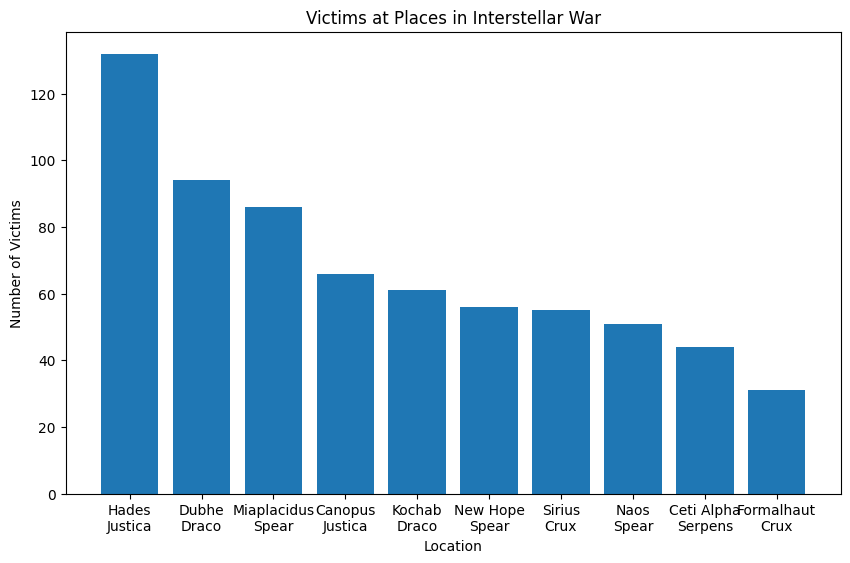

In [129]:
import matplotlib.pyplot as plt

# Sort the elements by count in descending order
sorted_elements = sorted(location_count.items(), key=lambda x: x[1], reverse=True)

# Extract the top 10 elements and their counts
top_10_elements = [element for element, count in sorted_elements[:10]]
top_10_counts = [count for element, count in sorted_elements[:10]]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_10_elements, top_10_counts)
plt.xlabel('Location')
plt.ylabel('Number of Victims')
plt.title('Victims at Places in Interstellar War')
plt.show()